# Predicting Survivors on Titanic using Kaggle Datasets

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Reading Data from Training Dataset

In [176]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head(5)
test_df = pd.read_csv('test.csv')
test_df.head(5)
#titanic_df.info()
#titanic_df.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [177]:
#drop the cloumns which are no use to us
titanic_df = titanic_df.drop(['Name','PassengerId','Ticket'],axis=1)
test_df = test_df.drop(['Name','Ticket'],axis=1)

In [178]:
print(titanic_df.info())
print('---------------------------------------------')
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 52.2+ KB
None
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 24.5+ KB
None


## Embark Column Fix

In [179]:
#Lets analyze Embarked column it has two missing values
pd.value_counts(titanic_df['Embarked'].values)
'''
S    644
C    168
Q     77
dtype: int64
'''
#Now S port is the port from which max people Embarked.
#Hence we can replace missing values with S
titanic_df['Embarked'] = titanic_df['Embarked'].fillna("S")
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 52.2+ KB
None


In [180]:
# Lets map S,C,Q  to 0,1,2 as we have to make all columns uniform with respect to data type
# Also let's decide whether to consider Embarked column in predictions,
# or remove "S" dummy variable, 
# or leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'],axis=1,inplace=True)

embark_dummies_test = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'],axis=1,inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'],axis=1,inplace=True)
test_df.drop(['Embarked'],axis=1,inplace=True)

print(titanic_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
C           891 non-null float64
Q           891 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 62.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
C              418 non-null float64
Q              418 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage:

## Fare Column fix (Only for test_df bcoz it has missing value)

In [181]:
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

#convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)

 ## Cabin Column Analysis

In [182]:
#Cabin has lot of Nan values. it won't have any significance on our prediction ,Hence, we can drop Cabin
print(titanic_df.info())
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
Cabin       204 non-null object
C           891 non-null float64
Q           891 non-null float64
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 59.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int32
C              418 non-null float64
Q              418 non-null float64
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.2+ KB
None


## Age Column Analysis

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


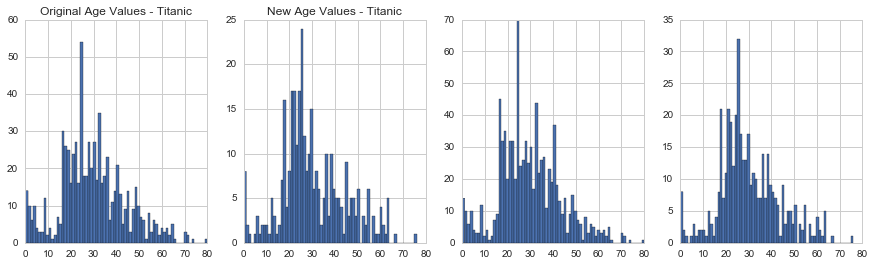

In [183]:
#Lot of values missing for Age lets do some analyis on age column like MEAN,STD,Nan etc
fig,(axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,4))
axis1.set_title('Original Age Values - Titanic')
axis2.set_title('New Age Values - Titanic')

#Get mean,std and nan values for titanic
average_age_titanic = titanic_df['Age'].mean()
std_age_titanic = titanic_df['Age'].std()
count_nan_age_titanic = titanic_df['Age'].isnull().sum()

#Get mean,std and nan values for Test Titanic
average_age_test = test_df['Age'].mean()
std_age_test = test_df['Age'].std()
count_nan_age_test = test_df['Age'].isnull().sum()

#generate random numbers between (mean - std) , (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic,average_age_titanic + std_age_titanic , size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test,average_age_test + std_age_test , size = count_nan_age_test)

#plot all original values
#NOTE: drop all null values and convert to int
titanic_df['Age'].dropna().astype(int).hist(bins=70,ax=axis1)
test_df['Age'].dropna().astype(int).hist(bins=70,ax=axis2)

#fill nan values in Age column with random values generated
titanic_df['Age'][np.isnan(titanic_df['Age'])] = rand_1
test_df['Age'][np.isnan(test_df['Age'])] = rand_2

#convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

#plot new values
titanic_df['Age'].dropna().astype(int).hist(bins=70,ax=axis3)
test_df['Age'].dropna().astype(int).hist(bins=70,ax=axis4)

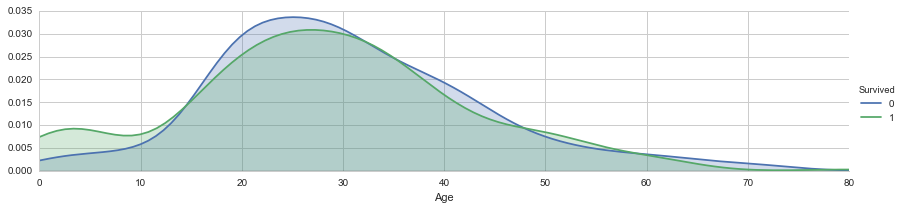

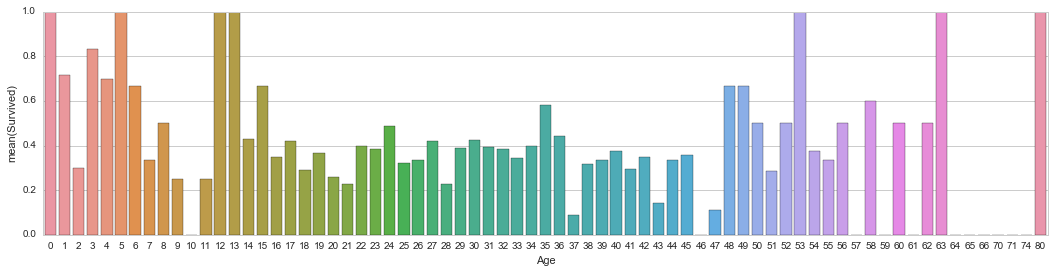

In [166]:
#Age continues
#peak for not-survived/survived passenger
facet = sns.FacetGrid(titanic_df,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,titanic_df['Age'].max()))
facet.add_legend()

#average survived passenger by Age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[['Age','Survived']].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age',y='Survived',data=average_age)


## Family Columns Analysis

In [184]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.

titanic_df['Family'] = titanic_df['Parch'] + titanic_df['SibSp']
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] ==0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

#drop parch and sibling
titanic_df = titanic_df.drop(['Parch','SibSp'],axis=1)
test_df = test_df.drop(['Parch','SibSp'],axis=1)
print(titanic_df.info())

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int32
Fare        891 non-null int32
C           891 non-null float64
Q           891 non-null float64
Family      891 non-null int64
dtypes: float64(2), int32(2), int64(3), object(1)
memory usage: 45.3+ KB
None


## Sex Column Analysis

In [185]:
#As we observer childern(Age<16), have high chance of survival
#Hence, we can classify passenger as male,female and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age<16 else sex

#Lets add a new column Person
titanic_df['Person']  = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person'] = test_df[['Age','Sex']].apply(get_person,axis=1) 

#We can drop Sex column now, as we are going to use person from now on
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

#Create dummy variable for Person column and drop Male as it has he lowest chance of survival
person_dummies_titanic = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'],axis=1,inplace=True)

person_dummies_test = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'],axis=1,inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df =    test_df.join(person_dummies_test)

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

print(titanic_df.head(5))
print(test_df.head(5))

   Survived  Pclass  Age  Fare    C    Q  Family  Child  Female
0         0       3   22     7  0.0  0.0       1    0.0     0.0
1         1       1   38    71  1.0  0.0       1    0.0     1.0
2         1       3   26     7  0.0  0.0       0    0.0     1.0
3         1       1   35    53  0.0  0.0       1    0.0     1.0
4         0       3   35     8  0.0  0.0       0    0.0     0.0
   PassengerId  Pclass  Age  Fare    C    Q  Family  Child  Female
0          892       3   34     7  0.0  1.0       0    0.0     0.0
1          893       3   47     7  0.0  0.0       1    0.0     1.0
2          894       2   62     9  0.0  1.0       0    0.0     0.0
3          895       3   27     8  0.0  0.0       0    0.0     0.0
4          896       3   22    12  0.0  0.0       1    0.0     1.0


## Pclass column Analysis

   PassengerId  Pclass  Age  Fare    C    Q  Family  Child  Female  Class_1  \
0          892       3   34     7  0.0  1.0       0    0.0     0.0      0.0   
1          893       3   47     7  0.0  0.0       1    0.0     1.0      0.0   
2          894       2   62     9  0.0  1.0       0    0.0     0.0      0.0   
3          895       3   27     8  0.0  0.0       0    0.0     0.0      0.0   
4          896       3   22    12  0.0  0.0       1    0.0     1.0      0.0   

   Class_2  
0      0.0  
1      0.0  
2      1.0  
3      0.0  
4      0.0  
   Survived  Pclass  Age  Fare    C    Q  Family  Child  Female  Class_1  \
0         0       3   22     7  0.0  0.0       1    0.0     0.0      0.0   
1         1       1   38    71  1.0  0.0       1    0.0     1.0      1.0   
2         1       3   26     7  0.0  0.0       0    0.0     1.0      0.0   
3         1       1   35    53  0.0  0.0       1    0.0     1.0      1.0   
4         0       3   35     8  0.0  0.0       0    0.0     0.0    

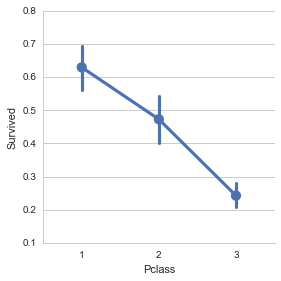

In [186]:
sns.factorplot('Pclass','Survived',order=[1,2,3],data=titanic_df)

#Lets ceate dummy variable for Pclass and drop pclass = 3 as it has the lowest survival rate
pclass_dummies_titanic = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'],axis=1,inplace=True)

pclass_dummies_test = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df = test_df.join(pclass_dummies_test)

print(test_df.head(5))
print(titanic_df.head(5))

## Define Training and Testing Datasets

In [190]:
X_train = titanic_df.drop(['Survived'],axis=1)
Y_train = titanic_df['Survived']
X_test  = test_df.drop('PassengerId',axis=1).copy()
print(X_test.head(1))
print(X_train.head(1))

   Pclass  Age  Fare    C    Q  Family  Child  Female  Class_1  Class_2
0       3   34     7  0.0  1.0       0    0.0     0.0      0.0      0.0
   Pclass  Age  Fare    C    Q  Family  Child  Female  Class_1  Class_2
0       3   22     7  0.0  0.0       1    0.0     0.0      0.0      0.0


## Lets Apply different Models and Check their Score

##  (1) Logistic Regression

In [191]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)
Y_pred = logReg.predict(X_test)
logReg.score(X_train,Y_train)

0.81144781144781142

## (2) Support Vector Machine(SVM)

In [192]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,Y_train)
Y_Pred = svc.predict(X_test)
svc.score(X_train,Y_train)

0.84960718294051629

## (3) Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
rf.score(X_train,Y_train)

0.96520763187429859

In [194]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)